# Toronto Dwellings Analysis Dashboard

In this notebook, you will compile the visualizations from the previous analysis into functions to create a Panel dashboard.

In [61]:
# imports
import panel as pn
pn.extension('plotly')
import plotly.express as px
import pandas as pd
import hvplot.pandas
import matplotlib.pyplot as plt
import os
import numpy as np
from pathlib import Path
from dotenv import load_dotenv

In [62]:
# Initialize the Panel Extensions (for Plotly)
import panel as pn
pn.extension("plotly")

In [63]:
# Read the Mapbox API key
load_dotenv()
map_box_api = os.getenv("mapbox")
px.set_mapbox_access_token(map_box_api)

# Import Data

In [4]:
# Import the CSVs to Pandas DataFrames
file_path = Path("toronto_neighbourhoods_census_data.csv")
housing_data = pd.read_csv(file_path, index_col="year")
housing_data.reset_index(inplace=True)
#housing_data

file_path = Path("toronto_neighbourhoods_coordinates.csv")
df_neighbourhood_locations = pd.read_csv(file_path)

- - -

## Panel Visualizations

In this section, you will copy the code for each plot type from your analysis notebook and place it into separate functions that Panel can use to create panes for the dashboard. 

These functions will convert the plot object to a Panel pane.

Be sure to include any DataFrame transformation/manipulation code required along with the plotting code.

Return a Panel pane object from each function that can be used to build the dashboard.

Note: Remove any `.show()` lines from the code. We want to return the plots instead of showing them. The Panel dashboard will then display the plots.

### Global available data

### Panel Visualization Functions

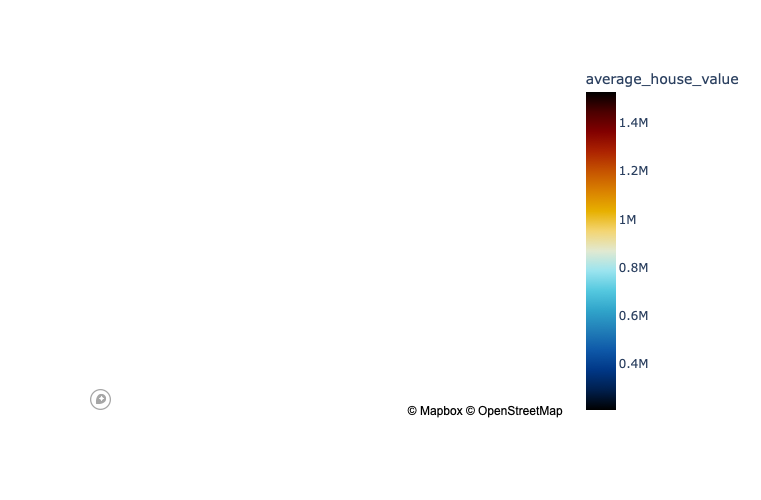

In [56]:
#Dataframe from neighbourhood map function\
neighbourhood_avg_map = housing_data[['neighbourhood','average_house_value']]
neighbourhood_avg_map_mean = neighbourhood_avg_map.groupby('neighbourhood').mean()
location_value_map_join = neighbourhood_avg_map_mean.join(df_neighbourhood_locations.set_index('neighbourhood'), on='neighbourhood')


# Define Panel visualization functions
def neighbourhood_map():
    """Neighbourhood Map"""
    return px.scatter_mapbox(
                    location_value_map_join, 
                    lat="lat", 
                    lon="lon",     
                    color="average_house_value", 
                    size="average_house_value",
                    color_continuous_scale=px.colors.cyclical.IceFire, 
                    size_max=15, zoom=10, height=500, width=1100)

neighbourhood_map()

In [155]:
#Dataframe for bar and line charts
dwelling_type_data = housing_data[['single_detached_house',
                     'apartment_five_storeys_plus',
                     'movable_dwelling',
                     'semi_detached_house',
                     'row_house',	
                     'duplex',	
                     'apartment_five_storeys_less',	
                     'other_house',
                     'year']]
dwelling_type_data

group_by_year_data = dwelling_type_data.groupby('year').sum()
group_by_year_data

def create_bar_chart(data, title, xlabel, ylabel, color, rot, height, width):
    """
    Create a barplot based in the data argument.
    """
    
    return data.hvplot.bar(title = title, 
                           xlabel=xlabel, 
                           ylabel=ylabel, 
                           color=color, 
                           rot=rot, 
                           height=height, 
                           width=width).opts(yformatter="%.0f")

# create_bar_chart(group_by_year_data.loc[2001], "Dwelling Types in Toronto in 2001", "2001", "Dwelling Type Units", "red", 90, 500, 500)
# create_bar_chart(group_by_year_data.loc[2006], "Dwelling Types in Toronto in 2006", "2006", "Dwelling Type Units", "blue", 90, 500, 500) 
# create_bar_chart(group_by_year_data.loc[2011], "Dwelling Types in Toronto in 2011", "2011", "Dwelling Type Units", "orange", 90, 500, 500)
# create_bar_chart(group_by_year_data.loc[2016], "Dwelling Types in Toronto in 2016", "2016", "Dwelling Type Units", "green", 90, 500, 500)

In [156]:
#Data for average monthly shelter costs for owned dwellings
shelter_cost_owned_data = housing_data[['shelter_costs_owned','year']]
shelter_owned_mean = shelter_cost_owned_data.groupby('year').mean()

#Data for average monthly shelter costs for rented dwellings
shelter_cost_rented_data = housing_data[['shelter_costs_rented','year']]
shelter_rented_mean = shelter_cost_rented_data.groupby('year').mean()

def create_line_chart(data, title, xlabel, ylabel, color, rot, height, width):
    """
    Create a line chart based in the data argument.
    """
    
    return data.hvplot(title = title, 
                           xlabel=xlabel, 
                           ylabel=ylabel, 
                           color=color, 
                           rot=rot, 
                           height=height, 
                           width=width).opts(yformatter="%.0f")

create_line_chart(shelter_owned_mean, "Average Monthly Shelter Cost for Owned Dwellings in Toronto", "Year", "Average Monthly Shelter Costs", "red", 0, 500, 1000)

create_line_chart(shelter_rented_mean, "Average Monthly Shelter Cost for Rented Dwellings in Toronto", "Year", "Average Monthly Shelter Costs", "blue", 0, 500, 1000)

# def shelter_cost_owned():
    
#     return shelter_owned_mean.hvplot.line( 
#                  title = "Average Monthly Shelter Cost for Owned Dwellings in Toronto", 
#                  xlabel="Year", 
#                  ylabel="Average Monthly Shelter Costs", 
#                  color="orange", 
#                  rot=0, 
#                  height=500,
#                  width=500).opts(yformatter="%.0f")
# shelter_cost_owned()

# def shelter_cost_rented():
    
#     return shelter_rented_mean.hvplot.line( 
#                  title = "Average Monthly Shelter Cost for Rented Dwellings in Toronto", 
#                  xlabel="Year", 
#                  ylabel="Average Monthly Shelter Costs", 
#                  color="red", 
#                  rot=0, 
#                  height=500,
#                  width=500).opts(yformatter="%.0f")
# shelter_cost_rented()

:Curve   [year]   (shelter_costs_rented)

In [99]:

create_line_chart(shelter_owned_mean, "Average Monthly Shelter Cost for Owned Dwellings in Toronto", "Year", "Average Monthly Shelter Costs", "red", 0, 500, 1000)


:Curve   [year]   (shelter_costs_owned)

In [100]:
#Data for average house value
average_house_value = housing_data[['average_house_value','year']]
average_house_value_mean = average_house_value.groupby('year').mean()


def average_house_value():
    """Average house values per year."""
    
    return average_house_value_mean.hvplot( 
                 title = "Average House Value in Toronto", 
                 xlabel="Year", 
                 ylabel="Average House Value", 
                 color="purple", 
                 rot=0, 
                 height=500,
                 width=1000).opts(yformatter="%.0f")
average_house_value()

:Curve   [year]   (average_house_value)

In [148]:
#Data from average house value by neighbourhood
average_house_value_neighbourhood = housing_data[['year','average_house_value','neighbourhood']]
average_house_value_neighbourhood

def average_value_by_neighbourhood():
    """Average house values by neighbourhood."""
    
    return average_house_value_neighbourhood.hvplot.line(
                 title = "Average Prices per Neighbourhood", 
                 xlabel="Year", 
                 ylabel="Avg house Value", 
                 #color="green",
                 x = 'year',
                 rot=90, 
                 height=500,
                 width=700,
                 groupby = 'neighbourhood'
                 ).opts(yformatter="%.0f")

average_value_by_neighbourhood()

:DynamicMap   [neighbourhood]
   :Curve   [year]   (average_house_value)

In [149]:
#Data  from dwelling type by year and neighbourhood
dwelling_per_type = housing_data[['single_detached_house',
                     'apartment_five_storeys_plus',
                     'movable_dwelling',
                     'semi_detached_house',
                     'row_house',	
                     'duplex',	
                     'apartment_five_storeys_less',	
                     'other_house', 'neighbourhood',
                     'year']]
dwelling_per_type

def number_dwelling_types():
    """Number of dwelling types per year"""
    
    return dwelling_per_type.hvplot.bar(
                 title = "Dwelling Types in the Locality", 
                 xlabel="Year", 
                 ylabel="Dwelling Type Units", 
                 #color="green",
                 x = 'year',
                 rot=90, 
                 height=500,
                 width=700,
                 groupby = 'neighbourhood'
                 ).opts(yformatter="%.0f")
number_dwelling_types()

:DynamicMap   [neighbourhood]
   :Bars   [year,Variable]   (value)

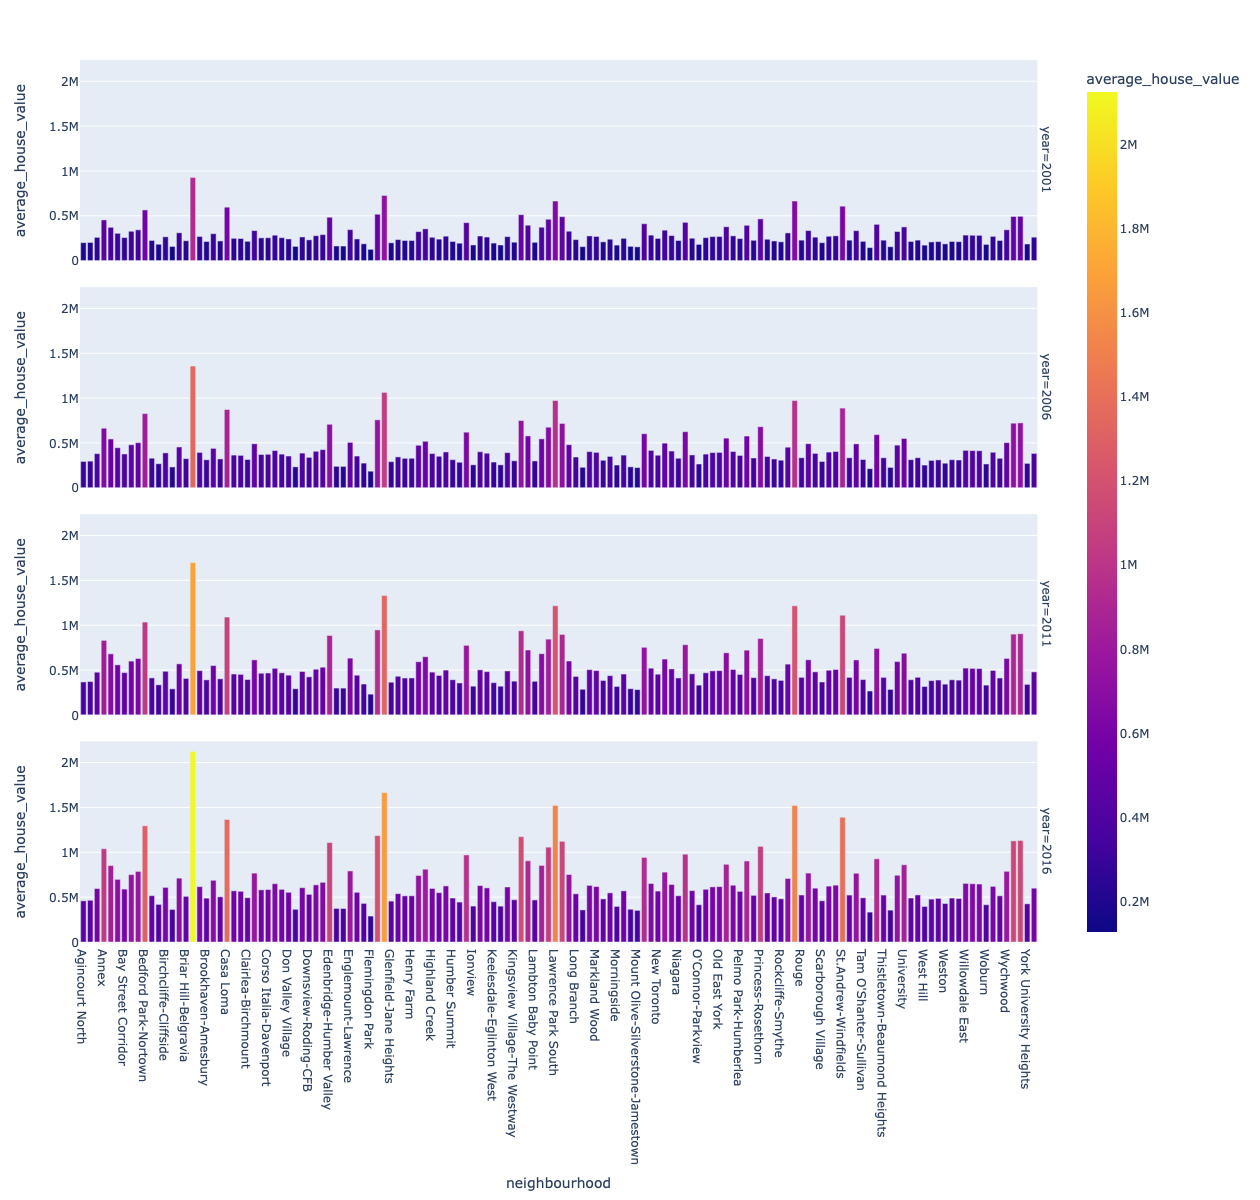

In [150]:
#Data for Average house value in Toronto neighborhoods
dwelling_value_toronto = housing_data[['neighbourhood','average_house_value','year']]
dwelling_value_toronto

def average_house_value_snapshot():
    """Average house value for all Toronto's neighbourhoods per year."""

    return px.bar(
                dwelling_value_toronto, 
                x="neighbourhood", 
                y="average_house_value", 
                color="average_house_value", 
                facet_row="year",
                height=1200,
                width = 800)
average_house_value_snapshot()

In [151]:
#Data Prep for top more expensive neighbourhoods
expensive_neighbourhood = housing_data[['average_house_value','neighbourhood']]
top10_dataset = expensive_neighbourhood.groupby('neighbourhood').sum()
top10_dataset

top10_expensive_neighbourhood_grouped = top10_dataset.nlargest(10, 'average_house_value')
top10_expensive_neighbourhood_grouped


def top_most_expensive_neighbourhoods():
    """Top 10 most expensive neighbourhoods."""
    
    return top10_expensive_neighbourhood_grouped.hvplot.bar(
                 title = "Top 10 Expensive Neighbourhoods in Toronto", 
                 xlabel="Neighbourhood", 
                 ylabel="Average House Value", 
                 color="purple", 
                 rot=90, 
                 height=500,
                 width=800
                 ).opts(yformatter="%.0f")
top_most_expensive_neighbourhoods()

:Bars   [neighbourhood]   (average_house_value)

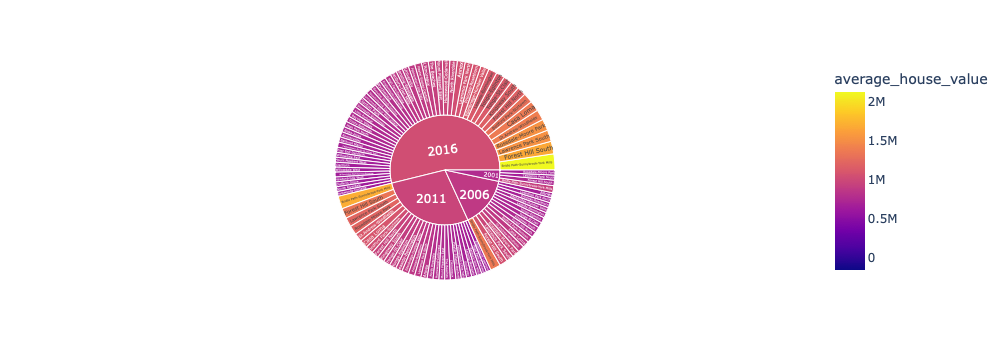

In [204]:
#Data for sunburst charts
expensive_neighbourhood_opt = housing_data[['average_house_value','neighbourhood','year']]
top10_expensive_neighbourhood_grouped_opt = expensive_neighbourhood_opt.nlargest(100, 'average_house_value')
top10_expensive_neighbourhood_grouped_opt

def sunburts_cost_analysis():
    """Sunburst chart to conduct a costs analysis of most expensive neighbourhoods in Toronto per year."""
    
    return px.sunburst(          top10_expensive_neighbourhood_grouped_opt, 
                                 path=['year', 'neighbourhood'], 
                                 values='average_house_value',
                                 color='average_house_value', 
                                 color_continuous_midpoint=np.average(top10_expensive_neighbourhood_grouped_opt['average_house_value'], 
                                 weights=top10_expensive_neighbourhood_grouped_opt['average_house_value']))
sunburts_cost_analysis()

## Panel Dashboard

In this section, you will combine all of the plots into a single dashboard view using Panel. Be creative with your dashboard design!

In [198]:
# Create a Title for the Dashboard
# dashboard_title: '#Real Estate Analysis of Toronto from 2001 to 2016'

In [206]:
# Define a welcome text
# dashboard_desc = "This Dashboard presents a visual analysis of historical values, dwelling types categorized in terms of costs and neighbourhoods in Toronto, ON, according to the census data from 2001 to 2016. You can navigate through the tabls above to explore more details about the evolution of the real estate market across these years."

In [200]:
#welcome tab
plot_map = pn.Row(neighbourhood_map())

#Yearly Market Analysis tab
row_of_bar = pn.Row(create_bar_chart(group_by_year_data.loc[2001], "Dwelling Types in Toronto in 2001", "2001", "Dwelling Type Units", "red", 90, 500, 500))
row_of_bar.append(create_bar_chart(group_by_year_data.loc[2006], "Dwelling Types in Toronto in 2006", "2006", "Dwelling Type Units", "blue", 90, 500, 500))
row_of_bar2 = pn.Row(create_bar_chart(group_by_year_data.loc[2011], "Dwelling Types in Toronto in 2011", "2011", "Dwelling Type Units", "orange", 90, 500, 500))
row_of_bar2.append(create_bar_chart(group_by_year_data.loc[2016], "Dwelling Types in Toronto in 2016", "2016", "Dwelling Type Units", "green", 90, 500, 500))
plots_of_column = pn.Column( row_of_bar, row_of_bar2)

#shelter Costs vx Housing value
row_of_line3 = pn.Row(create_line_chart(shelter_owned_mean, "Average Monthly Shelter Cost for Owned Dwellings in Toronto", "Year", "Average Monthly Shelter Costs", "red", 0, 500, 1000))
row_of_line4 = pn.Row(create_line_chart(shelter_rented_mean, "Average Monthly Shelter Cost for Rented Dwellings in Toronto", "Year", "Average Monthly Shelter Costs", "blue", 0, 500, 1000))
row_of_line5 = pn.Row(average_house_value())
plots_of_column2 = pn.Column(row_of_line3, row_of_line4, row_of_line5)

#Neighbourhood Analysis tabs
row_of_line6 = pn.Row(average_value_by_neighbourhood())
row_of_bars7 = pn.Row(number_dwelling_types())
row_of_line6.append(average_house_value_snapshot())
plots_of_column3 = pn.Column(row_of_line6,row_of_bars7)

#Top Expensive Neighbourhoods
row_of_bar9 = pn.Row( top_most_expensive_neighbourhoods())
row_of_bar9.append( sunburts_cost_analysis())

In [201]:
# Create a tab layout for the dashboard
tabs = pn.Tabs(
    ("Welcome", plot_map),
    ("Yearly Market Analysis", plots_of_column),
    ("Shelter Costs vs Housing Value", plots_of_column2),
    ("Neighbourhood Analysis",  plots_of_column3),
    ("Top Expensive Neighbourhoods", row_of_bar9)
)
tabs

Tabs
    [0] Row
        [0] Plotly(Figure)
    [1] Column
        [0] Markdown(str)
        [1] Row
            [0] HoloViews(Bars)
            [1] HoloViews(Bars)
        [2] Row
            [0] HoloViews(Bars)
            [1] HoloViews(Bars)
    [2] Column
        [0] Row
            [0] HoloViews(Curve)
        [1] Row
            [0] HoloViews(Curve)
        [2] Row
            [0] HoloViews(Curve)
    [3] Column
        [0] Row
            [0] Row
                [0] HoloViews(DynamicMap)
                [1] Column
                    [0] WidgetBox
                        [0] Select(margin=(20, 20, 20, 20), name='neighbourhood', options=['Agincourt North', ...], value='Agincourt North', width=250)
                    [1] VSpacer()
            [1] Plotly(Figure, visible=False)
        [1] Row
            [0] Row
                [0] HoloViews(DynamicMap)
                [1] Column
                    [0] WidgetBox
                        [0] Select(margin=(20, 20, 20, 20), name='neighbourhood', options=['Agincourt North', ...], value='Agincourt North', width=250)
                    [1] VSpacer()
    [4] Row
        [0] HoloViews(Bars)
        [1] Plotly(Figure, visible=False)

In [202]:
# Create the main dashboard
# YOUR CODE HERE!

## Serve the Panel Dashboard

In [207]:
dashboard.servable()


NameError: name 'dashboard' is not defined

# Debugging

Note: Some of the Plotly express plots may not render in the notebook through the panel functions.

However, you can test each plot by uncommenting the following code

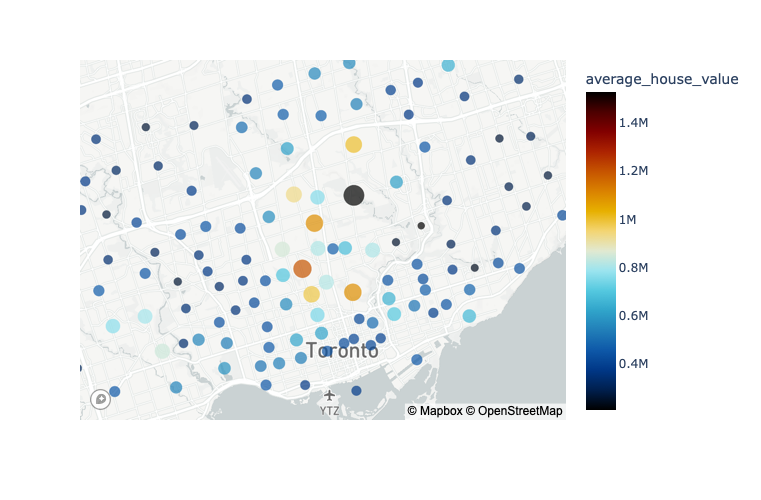

In [57]:
neighbourhood_map()

In [157]:
# create_bar_chart(data, title, xlabel, ylabel, color)

# # Bar chart for 2001 - completed
create_bar_chart(group_by_year_data.loc[2001], "Dwelling Types in Toronto in 2001", "2001", "Dwelling Type Units", "red", 90, 500, 500)

:Bars   [index]   (2001)

In [158]:
# # Bar chart for 2006 - completed
create_bar_chart(group_by_year_data.loc[2006], "Dwelling Types in Toronto in 2006", "2006", "Dwelling Type Units", "blue", 90, 500, 500)

:Bars   [index]   (2006)

In [159]:
# # Bar chart for 2011 - completed
create_bar_chart(group_by_year_data.loc[2011], "Dwelling Types in Toronto in 2011", "2011", "Dwelling Type Units", "orange", 90, 500, 500)

:Bars   [index]   (2011)

In [160]:
# # Bar chart for 2016 - complteted
create_bar_chart(group_by_year_data.loc[2016], "Dwelling Types in Toronto in 2016", "2016", "Dwelling Type Units", "green", 90, 500, 500)

:Bars   [index]   (2016)

In [47]:
# create_line_chart(data, title, xlabel, ylabel, color)

# # Line chart for owned dwellings
create_line_chart(shelter_owned_mean, "Average Monthly Shelter Cost for Owned Dwellings in Toronto", "Year", "Average Monthly Shelter Costs", "red", 0, 500, 500)

:Curve   [year]   (shelter_costs_owned)

In [46]:
# # Line chart for rented dwellings
create_line_chart(shelter_rented_mean, "Average Monthly Shelter Cost for Rented Dwellings in Toronto", "Year", "Average Monthly Shelter Costs", "blue", 0, 500, 500)

:Curve   [year]   (shelter_costs_rented)

In [40]:
 average_house_value()

:Curve   [year]   (average_house_value)

In [41]:
 average_value_by_neighbourhood()

:DynamicMap   [neighbourhood]
   :Curve   [year]   (average_house_value)

In [42]:
 number_dwelling_types()

:DynamicMap   [neighbourhood]
   :Bars   [year,Variable]   (value)

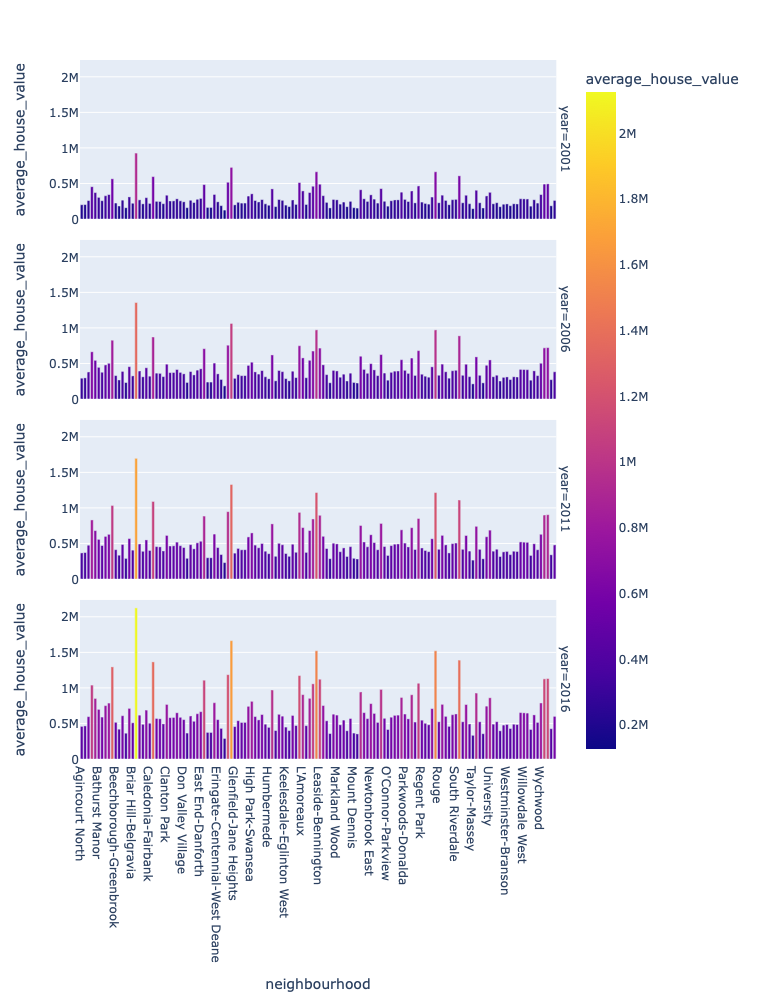

In [43]:
 average_house_value_snapshot()

In [44]:
 top_most_expensive_neighbourhoods()

:Bars   [neighbourhood]   (average_house_value)

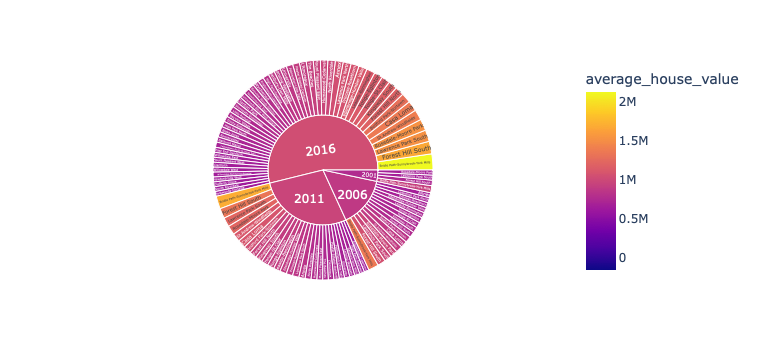

In [45]:
 sunburts_cost_analysis()